In [1]:
import numpy as np

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [2]:
NUM_CLASSES = 10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test  = to_categorical(y_test, NUM_CLASSES)

In [4]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, Dropout, LeakyReLU, Activation
from tensorflow.keras.models import Model

input_layer = Input((32, 32, 3))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate=0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 16, 16, 32)        0     

In [6]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [7]:
model.fit(x_train,
            y_train,
            batch_size=32,
            epochs=10,
            shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5567 - accuracy: 0.4567
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1720 - accuracy: 0.5848
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0131 - accuracy: 0.6436
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9194 - accuracy: 0.6806
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8517 - accuracy: 0.7023
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8019 - accuracy: 0.7227
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7537 - accuracy: 0.7384
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7176 - accuracy: 0.7483
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6819 - accuracy: 0.7620
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.649

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7941 - accuracy: 0.7332


[0.7940712571144104, 0.7332000136375427]

In [9]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer',
                    'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

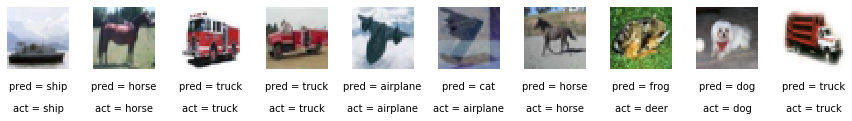

In [11]:
import matplotlib.pyplot as plt
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)


for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10,
            ha='center', transform=ax.transAxes)
    ax.imshow(img)

plt.show() 